<a href="https://colab.research.google.com/github/sonudk/Introduction_to_AI_and_IoT-/blob/master/BHAKTI_TIME_Backpropagation_XOR_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing Back-propagation Algorithm with XOR data

### XOR data: <br>
**$ x_0 \ x_1 \ y$** <br>
$0 \ \ \  0 \ \ \  0$ <br>
$0 \ \ \  1 \ \ \  1$ <br>
$1 \ \ \  0 \ \ \  1$<br>
$1 \ \ \  1 \ \ \  0$<br>

---



In [0]:
import numpy as np
import matplotlib.pyplot as plt

##Activation function

Sigmoid function $$\frac{1}{1+ e^{-x}} $$

In [0]:
#Define our activation function

def sigmoid (x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''
    # YOUR CODE HERE
    return (1/(1+np.exp(-x))) 

In [217]:
'''Testing'''
assert sigmoid(0)==0.5
assert np.isclose(sigmoid(-2), 0.119202922, atol=0.0001)
print('Test passed', '\U0001F44D')

Test passed 👍


In [0]:
# Define the activation function derivative

def sigmoid_derivative(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
        y = derivative of sigmoid
    '''
    # YOUR CODE HERE
    return x*(1-x)
    

In [219]:
'''Testing code for sigmoid_derivative'''
assert sigmoid_derivative(1) == 0
assert sigmoid_derivative(0) == 0
print('Test passed', '\U0001F44D')


Test passed 👍


## Defining the model

In [0]:
#Define the NeuralNetwork class
# why we do testing it is for our clearence that before we judge our model we should be sure that what we have written in codee matches with mathematics that we didi on paper

class NeuralNetwork:
    def __init__(self, net_arch):
        '''    
        Input:
            net_arch: list of 3 integers
        Action:
            Creates instance variables:
                self.input: np array of shape (ni,1)
                self.layer1: nprarray of shape (nh,1)
                self.output: np array of shape (no,1)
                self.weights1: np array of shape (nh, ni), initialized randomly between (-1,1)
                self.weights2: np array of shape (no, nh), initialized randomly between (-1,1)
                
            NOTE: We do not use bias explicitly here. Input x can have the first element 1 to have a bias term.
        '''
        ni = net_arch[0]  ## Number of neurons in input layer    
        nh = net_arch[1]  ## Number of neurons in hidden layer
        no = net_arch[2]  ## Number of neurons in output layer
        
        self.ni = ni
        self.nh = nh
        self.no = no
        
        self.input = np.empty([self.ni,1])
        self.layer1 = np.empty([self.nh,1])
        self.output = np.empty([self.no,1])
        
        # YOUR CODE HERE
        '''w=np.zeros((nh,ni))
        for i in range(nh):
          for j in range(ni):
            w[i][j]=np.random.random()'''
        np.random.seed(10)
        self.weights1 = 2 * np.random.random((self.nh,self.ni)) - 1
        self.weights2 = 2 * np.random.random((self.no,self.nh)) - 1        
        
    def feedforward(self,x):
        '''
        Input:
            x: numpy array of shape (ni,1)
        Action:
            
        Return:
            output: numpy array of shape (no,1),
        '''
        # YOUR CODE HERE
        # this is for first layer
        h1=np.dot(self.weights1,x)
        v=np.zeros((self.nh,1))
        for i in range(h1.shape[0]):
          v[i]=sigmoid (h1[i])
        # it is for second layer
        h2=np.dot(self.weights2,v)
        y=np.zeros((self.no,1))
        for i in range(h2.shape[0]):
          y[i]=sigmoid (h2[i])
        return y#,v  
             

    def backprop(self,x,y,eta):
        '''
        ########### DOUBT : will v change with back propagation and do we need to use changed v in this function ############
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        Input:
            x: numpy array of shape (ni,1)
            y: numpy array of shape (no,1)
            eta: learning rate
        Action:
        # Finding the derivatives
            del_weights2: np array of shape (no,nh) that stores the derivative of the loss function with respect to weights2
            del_weights1: np array of shape (nh,ni) that stores the derivative of the loss function with respect to weights1
            
        # Update the weights with the derivative of the loss function
            weights1 += eta*del_weights1
            weights2 += eta*del_weights2
        '''
        # YOUR CODE HERE
        y_feed=self.feedforward(x)# self input ka kya karna h
        # to create what to do should I define new function
        # creating input for next layer (means 'v')
        h1=np.dot(self.weights1,x)
        v=np.zeros((self.nh,1))
        for i in range(h1.shape[0]):
          v[i]=sigmoid (h1[i])
        #for second layer
        for i in range(self.no):
          for j in range(self.nh):
            self.weights2[i][j] = self.weights2[i][j] + eta * (y[i] - y_feed[i]) * (y_feed[i] * (1 - y_feed[i])) * v[j]
        # preparing delta1
        delta1=[]
        for j in range(self.nh):
          t = 0
          for i in range(self.no):
            t = t + (self.weights2[i][j] * (y[i] - y_feed[i]) * (y_feed[i] * (1 - y_feed[i])))     #### be careful about {[i][j]} things it is tricky part
          delta1.append(t)
        
        # for first layer
        for i in range(self.nh):
          for j in range(self.ni):
            self.weights1[i][j] = self.weights1[i][j] + eta * delta1[i] * (v[i] * (1 - v[i])) * x[j]
            
        return
          

    def fit(self, X, Y, eta, epochs):
        '''
        input:
        X: training input data of shape (4,2)
        Y: training output of shape (4,1)
        eta: learning rate
        epochs: number of epochs
        Action:
        # Modify the input by adding ones of shape(4,1) 
        # Set up the feed-forward propagation for the modified input   
        # Set up the back-propagation of the error to adjust the weights
        '''
        # YOUR CODE HERE
        X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
        for i in range(epochs):
          for j in range(X.shape[0]):
            
            self.feedforward(X[j].T)
            self.backprop(X[j].T,Y,eta)
        
        return
        
    def predict(self,x,y):
        '''
        # Predict function is used to check the prediction result of the neural network
        Input:
        x: single input data of shape (1,3)
        y: single output data of shape (1,1)
        Action
        pred_out: predict the output based on the model using feedforward
        
        Output
        error: y - pred_out
        
        
        '''
        # YOUR CODE HERE
        y_pred = self.feedforward(x)
        error = y - y_pred
        return(error)
        

In [221]:
'''Testing code for __init__'''

net_arch = [3,4,1]
nn1 = NeuralNetwork(net_arch)
assert nn1.input.shape == (3,1)
assert nn1.layer1.shape == (4,1)
assert nn1.output.shape == (1,1)
assert np.all(nn1.weights1 < 1)
print('Test passed', '\U0001F44D')


Test passed 👍


In [222]:

'''Testing code for feedforward'''

def feedforward_original(nn1,x):
    assert x.shape == (nn1.ni, 1)
    layer1 = sigmoid(np.dot(nn1.weights1, x))
    output = sigmoid(np.dot(nn1.weights2, layer1))
    return output
x = np.array([0,1,1]).reshape(-1, 1)
assert nn1.feedforward(x) == feedforward_original(nn1, x)
print('Test passed', '\U0001F44D')

Test passed 👍


In [223]:
'''Testing code for backprop'''
def backprop_original(nn1,x,y,eta):
    weights1 = nn1.weights1
    weights2 = nn1.weights2
    del_weights2 = np.dot(((y - nn1.output) * sigmoid_derivative(nn1.output)),nn1.layer1.reshape(-1, 1).T)
    del_weights1 = np.dot(((y - nn1.output) * sigmoid_derivative(nn1.output)*nn1.weights2.T * sigmoid_derivative(nn1.layer1)), x.T)

    # update the weights with the derivative (slope) of the loss function
    weights1 += eta*del_weights1
    weights2 += eta*del_weights2
    return(weights1, weights2)

x = np.array([0,1,1]).reshape(-1, 1)
y = np.array([[0],])
eta = 1
nn1.backprop(x, y, eta)
w1, w2 = backprop_original(nn1, x, y, eta) 
assert np.all(np.isclose(w1, nn1.weights1))
assert np.all(np.isclose(w2, nn1.weights2))
print('Test passed', '\U0001F44D')

Test passed 👍


## Fitting the data (Training)

In [0]:
## CHECK THE PERFORMANCE
'''
Input:
# Set the input data
X = ([[0.1, 0.1], [0.1, 0.9],
                [0.9, 0.1], [0.9, 0.9]])
# Set the labels, the correct results for the xor operation
Y = ([[0.1], [0.9], 
                 [0.9], [0.1]])
Action:
# Initialize the NeuralNetwork with
# 3 input neurons
# 4 hidden neurons
# 1 output neuron

# Fit the datas
'''
# YOUR CODE HERE

nn1 = NeuralNetwork([3,4,1])

X = np.array([[0.1, 0.1], [0.1, 0.9],[0.9, 0.1], [0.9, 0.9]])

Y = np.array([[0.1], [0.9],[0.9], [0.1]])

nn1.fit(X,Y,eta,epochs)



In [225]:
'''Testing for fit'''
X = np.array([[0.1, 0.1], [0.1, 0.9],
                [0.9, 0.1], [0.9, 0.9]])
# Set the labels, the correct results for the xor operation
Y = np.array([[0.1], [0.9], 
                 [0.9], [0.1]])
nn1.fit(X,Y,1,10000)
x = np.array([1,1,1]).reshape(-1, 1)
y = np.array([[0],])
print(nn1.feedforward(x),y)
assert np.all(np.isclose(nn1.feedforward(x),y,atol=0.11))
print('Test passed', '\U0001F44D')

[[0.09926878]] [[0]]
Test passed 👍


## Plotting 

In [0]:
def plotting(X, Y):
  x_plot = X.T
  color = []
  for i in Y:
    if i[0] == 0:
      color.append('r')
    else:
      color.append('b')
  color = np.array(color)
  print(x_plot)
  plt.figure()
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.scatter(x_plot[0],x_plot[1],color=color)
  plt.show()

[[0.1 0.1 0.9 0.9]
 [0.1 0.9 0.1 0.9]]


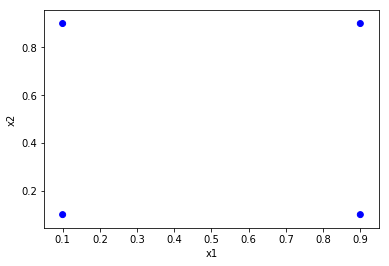

In [227]:
plotting(X, Y)

## Could you test it now?

Find the error between the predicted output and the desired output.

In [0]:
def testing(X, Y):
  ones = 0.9*np.ones((X.shape[0],1))
  x_test = np.concatenate([ones, X], axis=1)
  y_test = Y

  for k in range(4):
    print(nn.predict(x_test[k].reshape(-1, 1),y_test[k]))
    

In [229]:
'''Testing the prediction'''
x = np.array([0.9,0.9,0.9]).reshape(-1, 1)
y = np.array([[0.1],])

assert np.all(np.isclose(nn1.predict(x,y),0, atol=0.01))
print('Test passed', '\U0001F44D')

Test passed 👍


# Advanced
## Does the performance increase with increasing the number of neurons in the hidden layer?
- Repeat the training with 1 neuron in the hidden layer, then with 3 neuron and then with 5 neuron in the hidden layer to see the trend in performance
- Compare the training error
- Compare the testing error

In [241]:
nh_all = [1,3,5]
train_error = np.zeros((3,4))
test_error = np.zeros((3,4))
X = np.array([[0.1, 0.1], [0.1, 0.9],[0.9, 0.1], [0.9, 0.9]])

Y = np.array([[0.1], [0.9],[0.9], [0.1]])
#print(Y.shape)
eta = 1e-3
X1 = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)

epochs = 10
for i in range(len(nh_all)):
  nn = NeuralNetwork([3,nh_all[i],1])
  nn.fit(X,Y,eta,epochs)# solved probelm with any nh it may be < or > than ni
  for j in range(X1.shape[0]):
    train_error[i][j] = train_error[i][j] + (nn.feedforward(X1[j]) - Y[j])
    test_error[i][j] = test_error[i][j] + (nn.predict(X1[j].T,Y[j]))

print('Train errors:',train_error)    
print('Test errors:',test_error)    
'''train_error = train_error.reshape(12,1)
test_error = test_error.reshape(12,1)

plt.plot(train_error,test_error)'''


Train errors: [[ 0.46841403 -0.35459322 -0.31911859  0.45830093]
 [ 0.39655807 -0.34263684 -0.43801068  0.41915483]
 [ 0.63142091 -0.17515189 -0.18934917  0.60754846]]
Test errors: [[-0.46841403  0.35459322  0.31911859 -0.45830093]
 [-0.39655807  0.34263684  0.43801068 -0.41915483]
 [-0.63142091  0.17515189  0.18934917 -0.60754846]]


'train_error = train_error.reshape(12,1)\ntest_error = test_error.reshape(12,1)\n\nplt.plot(train_error,test_error)'